In [8]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(weights):
    qml.RX(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RX(weights[2], wires=1)
    return qml.probs(wires=1)

In [9]:
weights = np.array([0.1, 0.2, 0.3], requires_grad=True)
circuit(weights)

tensor([0.9658079, 0.0341921], requires_grad=True)

In [10]:
qml.gradients.param_shift(circuit)(weights)

tensor([[-0.04673668, -0.09442394, -0.14409127],
        [ 0.04673668,  0.09442394,  0.14409127]], requires_grad=True)

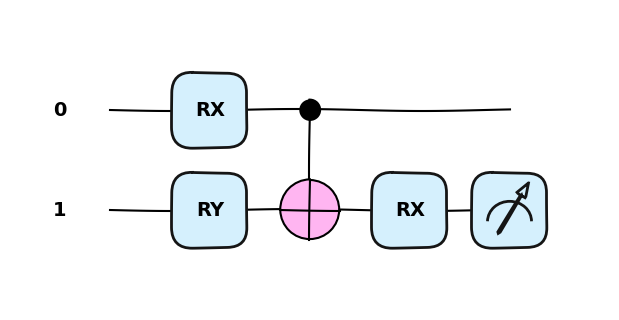

In [11]:
import matplotlib.pyplot as plt
qml.drawer.use_style("pennylane_sketch")
fig, ax = qml.draw_mpl(circuit)(weights)
plt.show()

In [17]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(weights):
    qml.RX(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RX(weights[2], wires=1)
    return qml.expval(qml.PauliZ(1))

In [18]:
weights = np.array([0.1, 0.2, 0.3], requires_grad=True)
circuit(weights)

tensor(0.9316158, requires_grad=True)

In [19]:
qml.gradients.param_shift(circuit)(weights)  # gradient

tensor([-0.09347337, -0.18884787, -0.28818254], requires_grad=True)

In [20]:
def f(weights):
    return np.stack(qml.gradients.param_shift(circuit)(weights))
qml.jacobian(f)(weights)  # hessian

array([[-0.9316158 ,  0.01894799,  0.0289147 ],
       [ 0.01894799, -0.9316158 ,  0.05841749],
       [ 0.0289147 ,  0.05841749, -0.9316158 ]])

In [21]:
@qml.qnode(dev, diff_method="parameter-shift", max_diff=2)
def circuit(weights):
    qml.RX(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RX(weights[2], wires=1)
    return qml.expval(qml.PauliZ(1))

In [22]:
weights = np.array([0.1, 0.2, 0.3], requires_grad=True)
qml.jacobian(qml.jacobian(circuit))(weights)  # hessian

array([[-0.9316158 ,  0.01894799,  0.0289147 ],
       [ 0.01894799, -0.9316158 ,  0.05841749],
       [ 0.0289147 ,  0.05841749, -0.9316158 ]])